In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

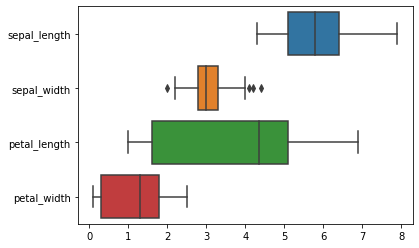

In [4]:
sns.boxplot(data = df, orient = "h")

<AxesSubplot:xlabel='species', ylabel='petal_length'>

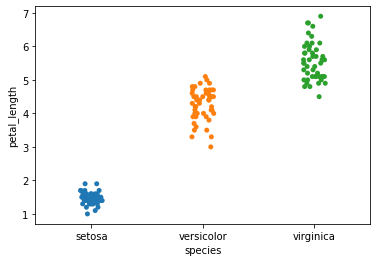

In [7]:
sns.stripplot(x = "species", y = "petal_length", data = df)

c:\users\jimmy\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

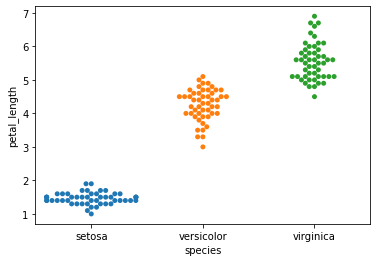

In [8]:
sns.swarmplot(x = "species", y = "petal_length", data = df)

c:\users\jimmy\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

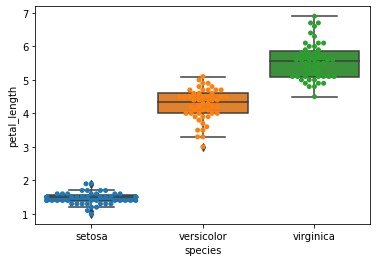

In [9]:
sns.boxplot(x = "species", y = "petal_length", data = df)
sns.swarmplot(x = "species", y = "petal_length", data = df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

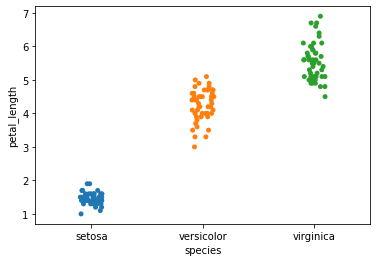

In [10]:
sns.stripplot(x = "species", y = "petal_length", data = df)

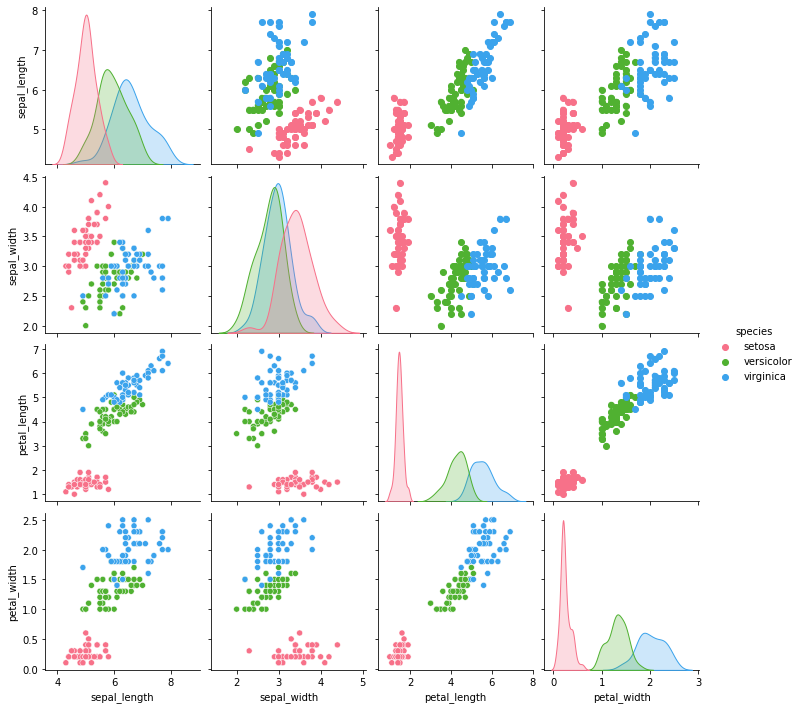

In [11]:
g = sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
g.map_upper(plt.scatter)

In [12]:
#Homework D22
#import the necessary function
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#get the dataset
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='sex', ylabel='survived'>

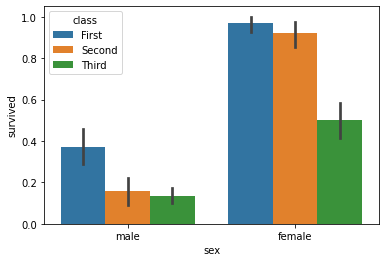

In [13]:
sns.barplot(x="sex",y="survived",hue="class",data=df)

In [15]:
# <AxesSubplot:xlabel='sex', ylabel='survived'>

# 在上面的示例中,我們可以看到每個班級中男性和女性的平均存活率。從情節中,我們可以理解,女性存活人數比男性多。在男性和女性中,更多的存活率來自頭等艙。

# 繪製數據子集的小倍數。 FacetGrid 示例,

# FacetGrid 類有助於可視化一個變數的分佈,以及使用多個面板在數據集子集中分別顯示多個變數之間的關係

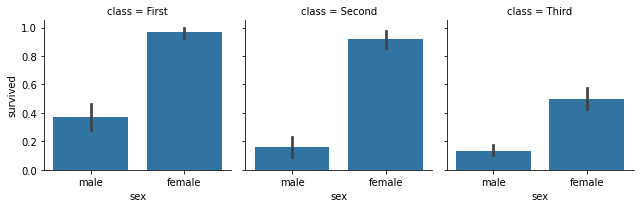

In [17]:
# 瞭解在各艙等不同性別的存活率
survive = sns.FacetGrid(df,col="class")
survive.map(sns.barplot,"sex","survived" ,order=["male","female"])

In [18]:
# 先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
# 其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。
# df.groupby('pclass').survived.sum()
#加上性別
survived=df.groupby(['pclass','sex']).survived.sum()
survived

pclass  sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: survived, dtype: int64

<AxesSubplot:xlabel='pclass,sex'>

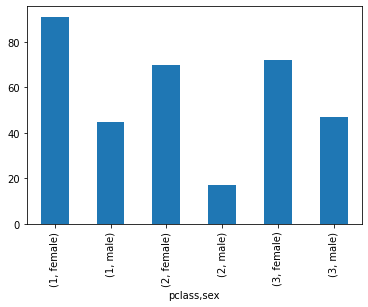

In [19]:
survived.plot(kind='bar')
# 使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
# 繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。

In [20]:
survived_counts = pd.crosstab([df.pclass,df.sex],df.survived)
survived_counts

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

<AxesSubplot:xlabel='pclass,sex'>

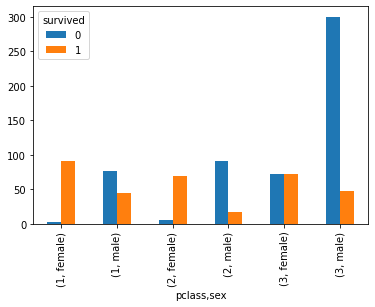

In [21]:
#使用survived_counts.plot做對照組

survived_counts.plot(kind='bar')

<AxesSubplot:xlabel='pclass,sex'>

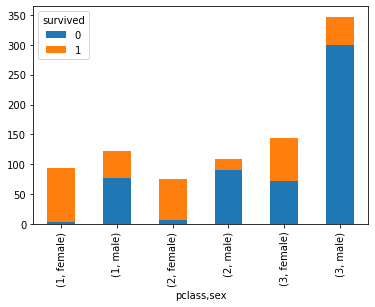

In [22]:
survived_counts.plot(kind='bar',stacked=True)

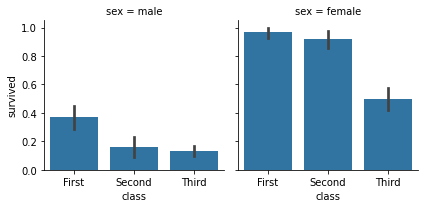

In [23]:
# 瞭解不同性別在各艙等的存活率
h = sns.FacetGrid(df,col="sex")
h.map(sns.barplot, "class", "survived",order=["First","Second","Third"])

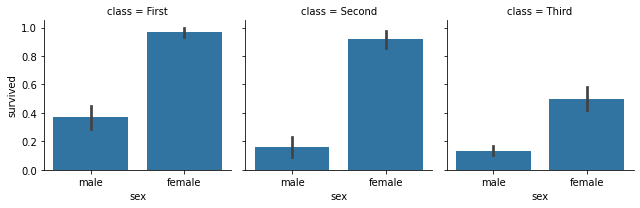

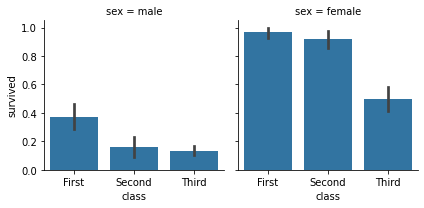

In [24]:
# PS: 跟第一次做 Face.Grid 有何不同??
g = sns.FacetGrid(df,col="class")
g.map(sns.barplot, "sex", "survived",order=["male","female"])

h = sns.FacetGrid(df,col="sex")
h.map(sns.barplot, "class", "survived",order=["First","Second","Third"])